# Group Project

## Companies
Goldman Sachs - Broker Dealer\
Bank of America - Depository (Bank)\
Metlife  - Insurance

# Packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

# Import Data

In [3]:
data = pd.read_excel('final_project/prices.xlsx')

In [4]:
data

,GS,Unnamed: 1,BAC,Unnamed: 3,MET,Unnamed: 5
0,Datum,Schluss,Datum,Schluss,Datum,Schluss
1,39085,200.72,39085,53.33,39085,53.6024
2,39086,198.85,39086,53.67,39086,53.9232
3,39087,199.05,39087,53.24,39087,53.2905
4,39090,203.73,39090,53.45,39090,53.2905
...,...,...,...,...,...,...
4273,45282,380.65,45282,33.43,45282,65.86
4274,45286,381.61,45286,33.86,45286,66.24
4275,45287,384.48,45287,33.84,45287,66.02
4276,45288,386.41,45288,33.88,45288,66.29


# Preprocessing

In [5]:
# Goldman Sachs (Broker Dealer)
GS = data.iloc[1:, 0:2]
GS.columns = ['date', 'price']
# from excel dates to datetime
GS['date'] = pd.to_numeric(GS['date'], errors='coerce')
GS['date'] = pd.to_datetime(GS['date'], unit='D', origin='1899-12-30')

# Bank of America (Depository)
BAC = data.iloc[1:, 2:4]
BAC.columns = ['date', 'price']
# from excel dates to datetime
BAC['date'] = pd.to_numeric(BAC['date'], errors='coerce')
BAC['date'] = pd.to_datetime(BAC['date'], unit='D', origin='1899-12-30')

# Metlife (Insurance)
MET = data.iloc[1:, 4:6]
MET.columns = ['date', 'price']
# from excel dates to datetime
MET['date'] = pd.to_numeric(MET['date'], errors='coerce')
MET['date'] = pd.to_datetime(MET['date'], unit='D', origin='1899-12-30')

# ensure price is numeric, compute proportional and log returns, drop NA, and reset index properly
GS['price'] = pd.to_numeric(GS['price'], errors='coerce')
GS['return'] = GS['price'].pct_change()
GS['log_return'] = pd.Series(np.log(GS['price'])).diff()
GS = GS.dropna().reset_index(drop=True)

BAC['price'] = pd.to_numeric(BAC['price'], errors='coerce')
BAC['return'] = BAC['price'].pct_change()
BAC['log_return'] = pd.Series(np.log(BAC['price'])).diff()
BAC = BAC.dropna().reset_index(drop=True)

MET['price'] = pd.to_numeric(MET['price'], errors='coerce')
MET['return'] = MET['price'].pct_change()
MET['log_return'] = pd.Series(np.log(MET['price'])).diff()
MET = MET.dropna().reset_index(drop=True)

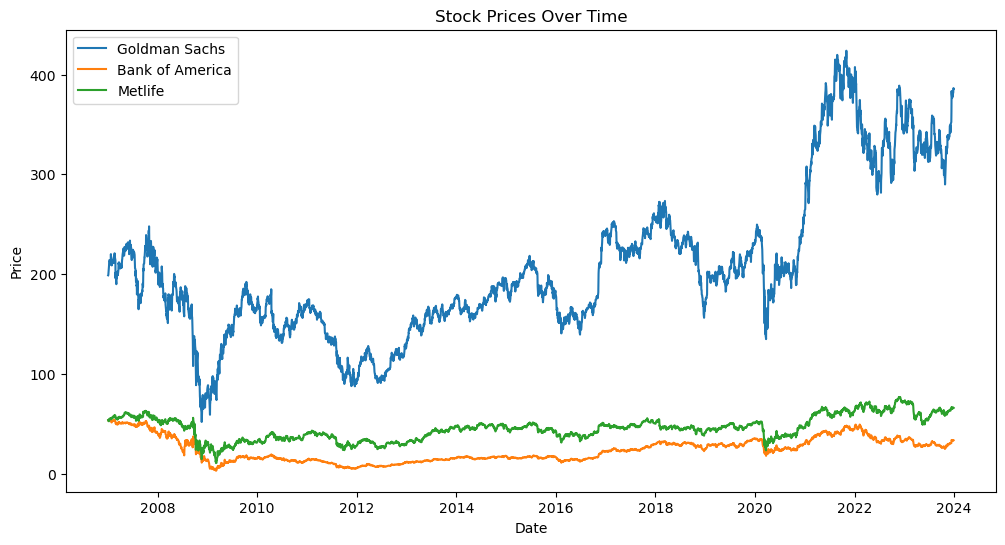

In [6]:
# plot all three price series
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(GS['date'], GS['price'], label='Goldman Sachs')
plt.plot(BAC['date'], BAC['price'], label='Bank of America')
plt.plot(MET['date'], MET['price'], label='Metlife')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

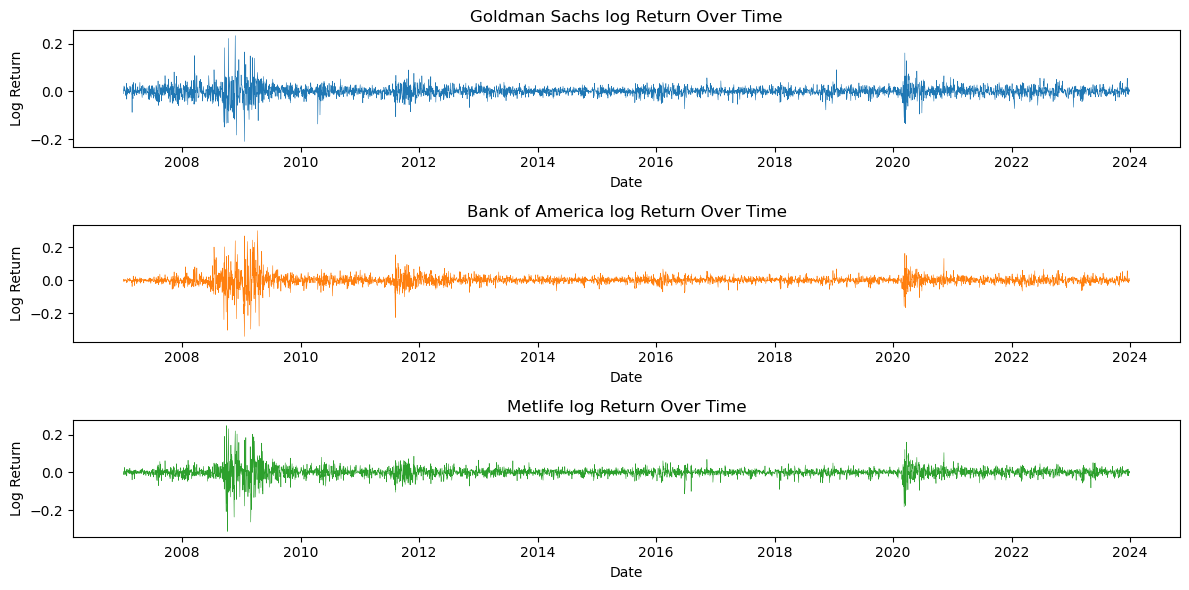

In [7]:
# plot all three log_returns series with thin lines all in subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(GS['date'], GS['log_return'], label='Goldman Sachs', linewidth=0.4, color="C0")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Goldman Sachs log Return Over Time')
plt.subplot(3, 1, 2)
plt.plot(BAC['date'], BAC['log_return'], label='Bank of America', linewidth=0.4, color="C1")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Bank of America log Return Over Time')
plt.subplot(3, 1, 3)
plt.plot(MET['date'], MET['log_return'], label='Metlife', linewidth=0.4, color="C2")
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Metlife log Return Over Time')
plt.tight_layout()


As expected the raw price data exhibits clear non-stationarity for all three companies. In the plots of the price data we can see clear differences between Goldman Sachs and the other two companies. While Bank of America and Metlife show a long lasting downward trend during the financial crisis of 2008, Goldman Sachs seems to recover more quickly. This is likely due to the fact that Goldman Sachs is a broker-dealer and investment bank, while Bank of America is a depository bank and Metlife is an insurance company. Broker-dealers and investment banks are less exposed to credit risk than depository banks and insurance companies, which makes them less vulnerable to financial crises. The transformation to log returns successfully removes this non-stationarity. After the transformation, these differences are no longer visible.

# Analysis (Stylized Facts)
We analyze the following stylized facts of our time series:
1. Heavy Tails
2. Skewness
3. Kurtosis
4. Autocorrelation of log Returns
5. Autocorrelation of squared log Returns
6. Volatility Clustering

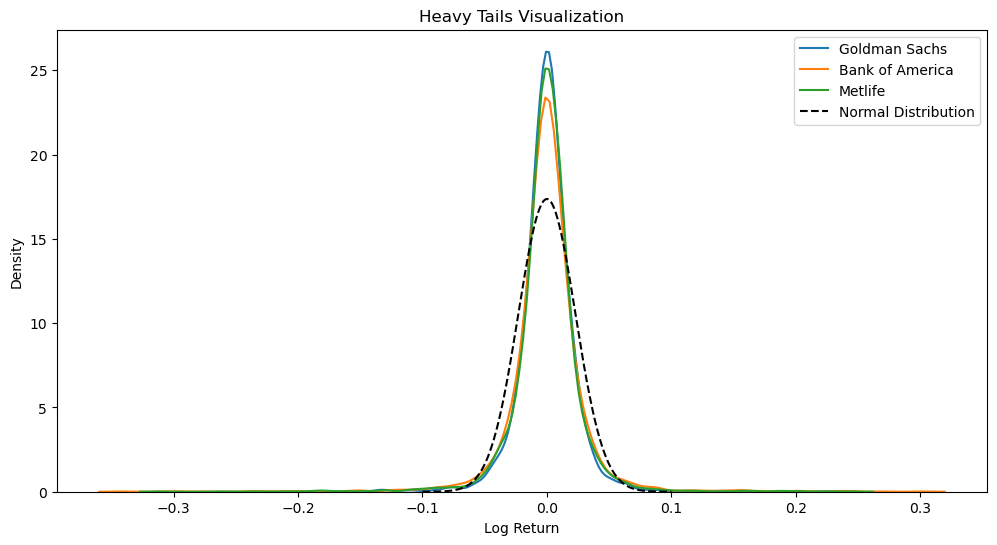

In [8]:
# heavy tails visualization
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.kdeplot(GS['log_return'], label='Goldman Sachs', color="C0")
sns.kdeplot(BAC['log_return'], label='Bank of America', color="C1")
sns.kdeplot(MET['log_return'], label='Metlife', color="C2")
# plot normal distribution for comparison
from scipy.stats import norm
x = np.linspace(-0.1, 0.1, 1000)
plt.plot(x, norm.pdf(x, 0, GS['log_return'].std()), label='Normal Distribution', color='black', linestyle='--')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.title('Heavy Tails Visualization')
plt.legend()
plt.show()

In [9]:
# skewness
from scipy.stats import skew
print("Skewness:")
print("Goldman Sachs:", skew(GS['log_return']))
print("Bank of America:", skew(BAC['log_return']))
print("Metlife:", skew(MET['log_return']))
print("Skewness of normal distribution is 0")

Skewness:
Goldman Sachs: 0.18747890499592207
Bank of America: -0.29323946556798924
Metlife: -0.48028760606666815
Skewness of normal distribution is 0



### Analysis of Skewness: 
Skewness measures the asymmetry of the return distribution 
We generally expect negative skewness, meaning large losses are more common than large gains.

* **MetLife (Insurance) - Skewness: -0.48**

  * **Interpretation:** This significant negative skewness indicates a "left-tailed" distribution. This aligns with the insurance business model, which is structurally short volatility. Insurers collect steady, small premiums (positive returns) most of the time but face rare, catastrophic payout events (large negative returns). The heavy left tail reflects this exposure to disaster risk or sudden asset devaluation which impacts their large investment portfolios.


* **Bank of America (Depository) - Skewness: -0.29**
  * **Interpretation:** Also negatively skewed, though less severe than MetLife. This reflects the traditional banking risk profile. Banks earn steady interest margins (net interest income) but are exposed to credit shocks, liquidity runs, or sudden macro-devaluations (like the 2008 crisis or 2023). The negative skew implies that "bad surprises" in credit markets are more frequent and severe than "good surprises."


* **Goldman Sachs (Broker-Dealer) - Skewness: +0.19**
  * **Interpretation:** This positive skewness is an anomaly. Right-tailed returns suggests large positive returns are more likely than large negative ones. This deviates from the standard stylized fact of negative asymmetry. As a broker-dealer and investment bank, Goldman Sachs relies heavily on trading revenue, advisory fees, and market-making. Positive skewness can appear in trading-heavy portfolios that are "long volatility" (gamma)—meaning they profit disproportionately from high volatility events. This suggests that during the sample period (2007-2023), Goldman was effective at capitalizing on market dislocations rather than just suffering from them.



In [10]:
# kurtosis
from scipy.stats import kurtosis
print("Kurtosis:")
print("Goldman Sachs:", kurtosis(GS['log_return'], fisher=True))
print("Bank of America:", kurtosis(BAC['log_return'], fisher=True))
print("Metlife:", kurtosis(MET['log_return'], fisher=True))
print("Kurtosis of normal distribution is 3")

Kurtosis:
Goldman Sachs: 14.81637929862475
Bank of America: 23.23112425876987
Metlife: 20.593656838955653
Kurtosis of normal distribution is 3


### 2. Analysis of Kurtosis: 
Kurtosis measures the "tailedness" of the distribution. A normal distribution has a kurtosis of 3. Values above 3 indicate **leptokurtosis** (fat tails).

* All three institutions exhibit extreme leptokurtosis, far exceeding the benchmark of the normal distribution of 3.
* **Goldman Sachs:** 14.82
* **MetLife:** 20.59
* **Bank of America:** 23.23

* **Interpretation:** This confirms the stylized fact of "Heavy Tails". The probability of extreme events (deviations from the mean) is exponentially higher than a normal distribution would predict. **Bank of America (Highest Kurtosis):** A kurtosis of 23.23 indicates extreme fragility to "black swan" events. Depositories are highly leveraged institutions; small shocks to asset values can wipe out equity. This extreme kurtosis likely captures the violent volatility of the 2008 Financial Crisis.
* **Risk Management Implication:** A standard Value-at-Risk (VaR) model assuming normality will disastrously underestimate risk. The "tail events" (losses beyond the VaR) are far more frequent and severe than Gaussian distributions will capture. This mandates the use of **Student-t distributions** or **Extreme Value Theory** for accurate modeling.

In [17]:
# jarque bera test
from scipy.stats import jarque_bera
print("Jarque-Bera Test:")
print("Goldman Sachs:", jarque_bera(GS['log_return']).statistic)
print("Bank of America:", jarque_bera(BAC['log_return']).statistic)
print("Metlife:", jarque_bera(MET['log_return']).statistic)
# benchmark for the jarque bera test is 5.99 at 5% significance level, since this test follows a chi squared distribution with 2 degrees of freedom

Jarque-Bera Test:
Goldman Sachs: 39137.10356878486
Bank of America: 96215.18320027072
Metlife: 75724.64730063485


### 3. Analysis of Jarque-Bera: Rejection of NormalityThe Jarque-Bera (JB) test checks the null hypothesis that data is normally distributed (Skewness = 0, Kurtosis = 3).

* 
**Observation:** The test statistics are very high, compared to a critical value of 5.99 (at 5% significance level of a chi-squared distribution with 2 degrees of freedom).


* **Interpretation:** We overwhelmingly reject the null hypothesis of normality for all three institutions. The p-value is close to zero. While the "Aggregational Gaussianity" stylized fact suggests returns normalize over long horizons, at the daily frequency, financial returns are definitively **non-normal**.


* **Modeling Consequence:** This result is the "smoking gun" that justifies using advanced econometric techniques. Since the data is not normal, OLS regression or simple variance-covariance VaR models are invalid. This empirically validates the need for **GARCH models** (to handle volatility clustering) with **non-normal innovations** (like the Student-t or Generalized Error Distribution) to capture the heavy tails and skewness observed above.


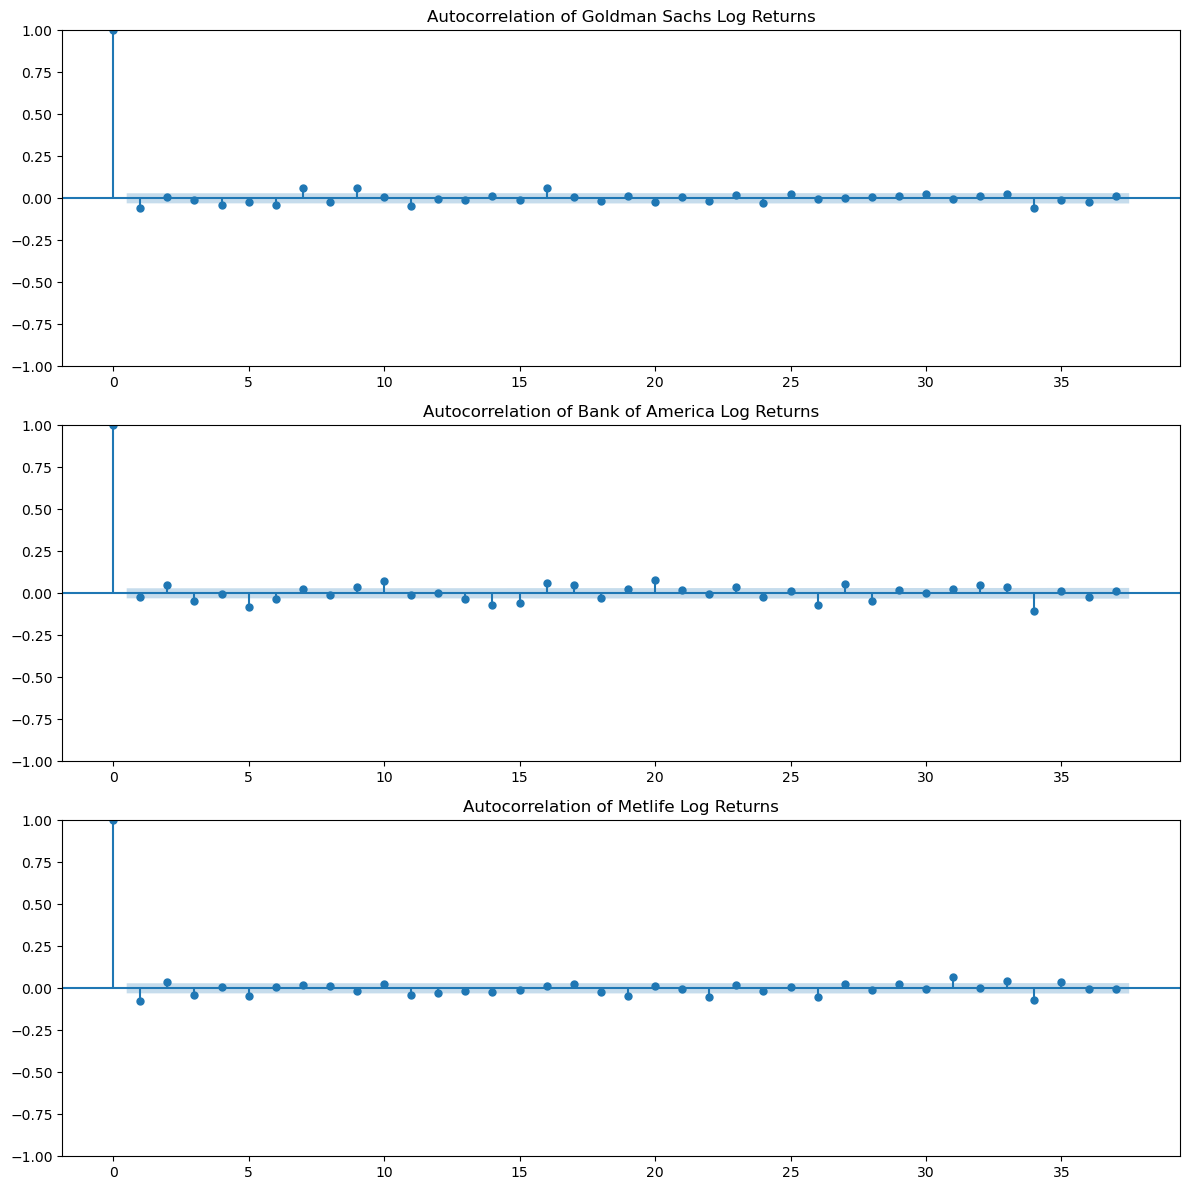

In [ ]:
# autocorrelation of log returns (dont plot for lag = 0)
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plot_acf(GS['log_return'], ax=plt.gca(), title='Autocorrelation of Goldman Sachs Log Returns')
plt.subplot(3, 1, 2)
plot_acf(BAC['log_return'], ax=plt.gca(), title='Autocorrelation of Bank of America Log Returns')
plt.subplot(3, 1, 3)
plot_acf(MET['log_return'], ax=plt.gca(), title='Autocorrelation of Metlife Log Returns')
plt.tight_layout()
plt.show()

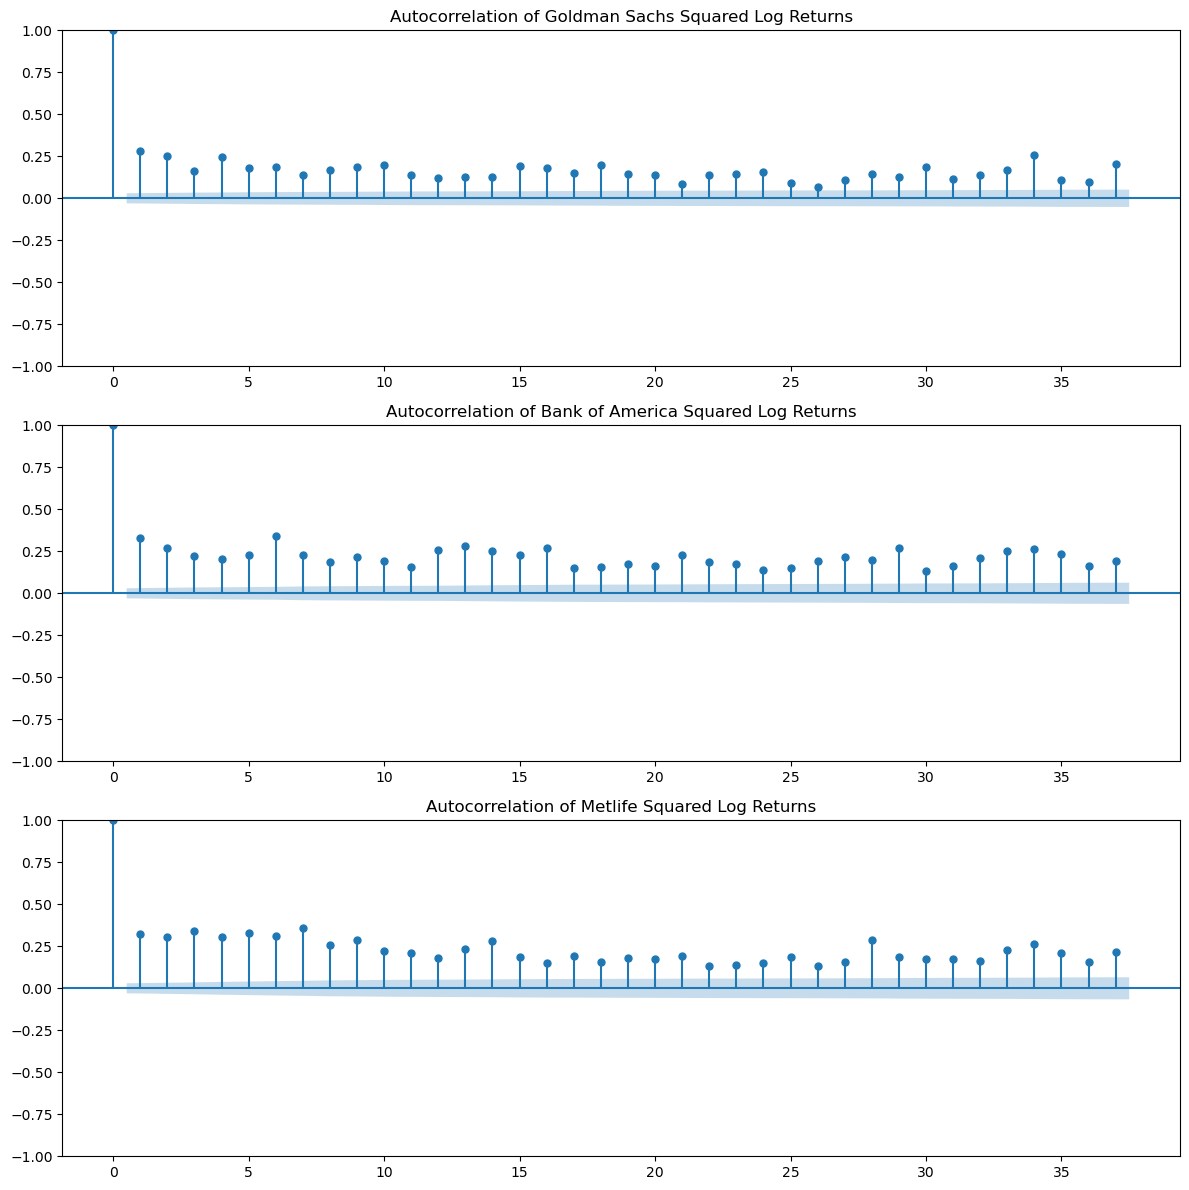

In [ ]:
# autocorrelation of squared log returns
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plot_acf(GS['log_return']**2, ax=plt.gca(), title='Autocorrelation of Goldman Sachs Squared Log Returns')
plt.subplot(3, 1, 2)
plot_acf(BAC['log_return']**2, ax=plt.gca(), title='Autocorrelation of Bank of America Squared Log Returns')
plt.subplot(3, 1, 3)
plot_acf(MET['log_return']**2, ax=plt.gca(), title='Autocorrelation of Metlife Squared Log Returns')
plt.tight_layout()
plt.show()

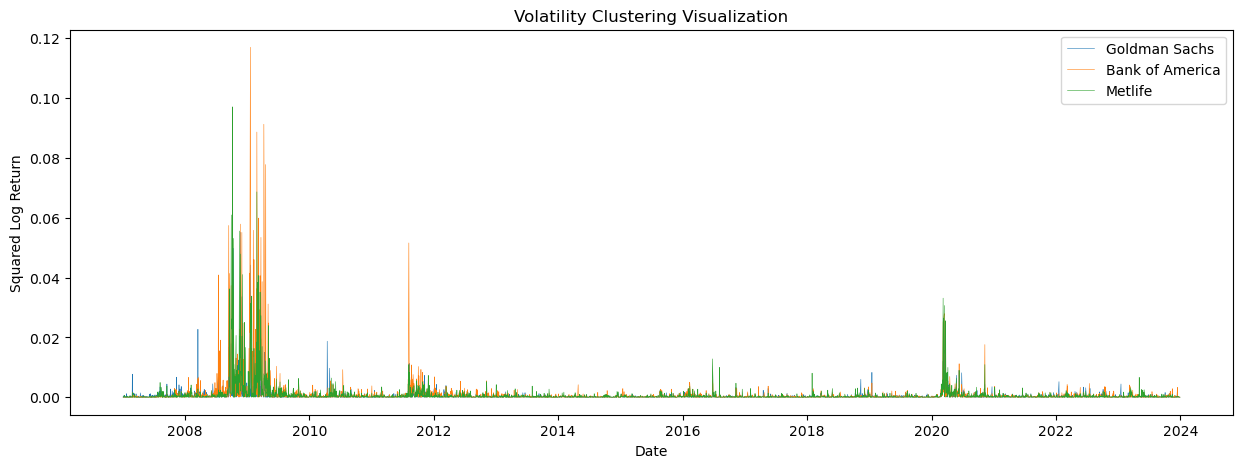

In [ ]:
# volatility clustering visualization
plt.figure(figsize=(15, 5))
plt.plot(GS['date'], GS['log_return']**2, label='Goldman Sachs', linewidth=0.4, color="C0")
plt.plot(BAC['date'], BAC['log_return']**2, label='Bank of America', linewidth=0.4, color="C1")
plt.plot(MET['date'], MET['log_return']**2, label='Metlife', linewidth=0.4, color="C2")
plt.xlabel('Date')
plt.ylabel('Squared Log Return')
plt.title('Volatility Clustering Visualization')
plt.legend()
plt.show()

# Risk Measure Estimation
## Historic Simulation

In [35]:
# implement Historic Simulation with window size of 250 days (1 year)
# historic var
def historic_var(returns, alpha=0.05, window_size=250):
    """
    Calculate the Value at Risk (VaR) using Historic Simulation method.
    """
    var_series = []
    for i in range(window_size, len(returns)):
        window_returns = returns[i-window_size:i]
        var = np.percentile(window_returns, alpha * 100)
        var_series.append(var)
    return pd.Series(var_series, index=returns.index[window_size:])

GS['var_95_HS'] = historic_var(GS['log_return'], alpha=0.05, window_size=250)
BAC['var_95_HS'] = historic_var(BAC['log_return'], alpha=0.05, window_size=250)
MET['var_95_HS'] = historic_var(MET['log_return'], alpha=0.05, window_size=250)

# ES with window size 250 days
def historic_es(returns, alpha=0.05, window_size=250):
    """
    Calculate the Expected Shortfall (ES) using Historic Simulation method.
    """
    es_series = []
    for i in range(window_size, len(returns)):
        window_returns = returns[i-window_size:i]
        var_threshold = np.percentile(window_returns, alpha * 100)
        es = window_returns[window_returns <= var_threshold].mean()
        es_series.append(es)
    return pd.Series(es_series, index=returns.index[window_size:])
GS['es_95_HS'] = historic_es(GS['log_return'], alpha=0.05, window_size=250)
BAC['es_95_HS'] = historic_es(BAC['log_return'], alpha=0.05, window_size=250)
MET['es_95_HS'] = historic_es(MET['log_return'], alpha=0.05, window_size=250)

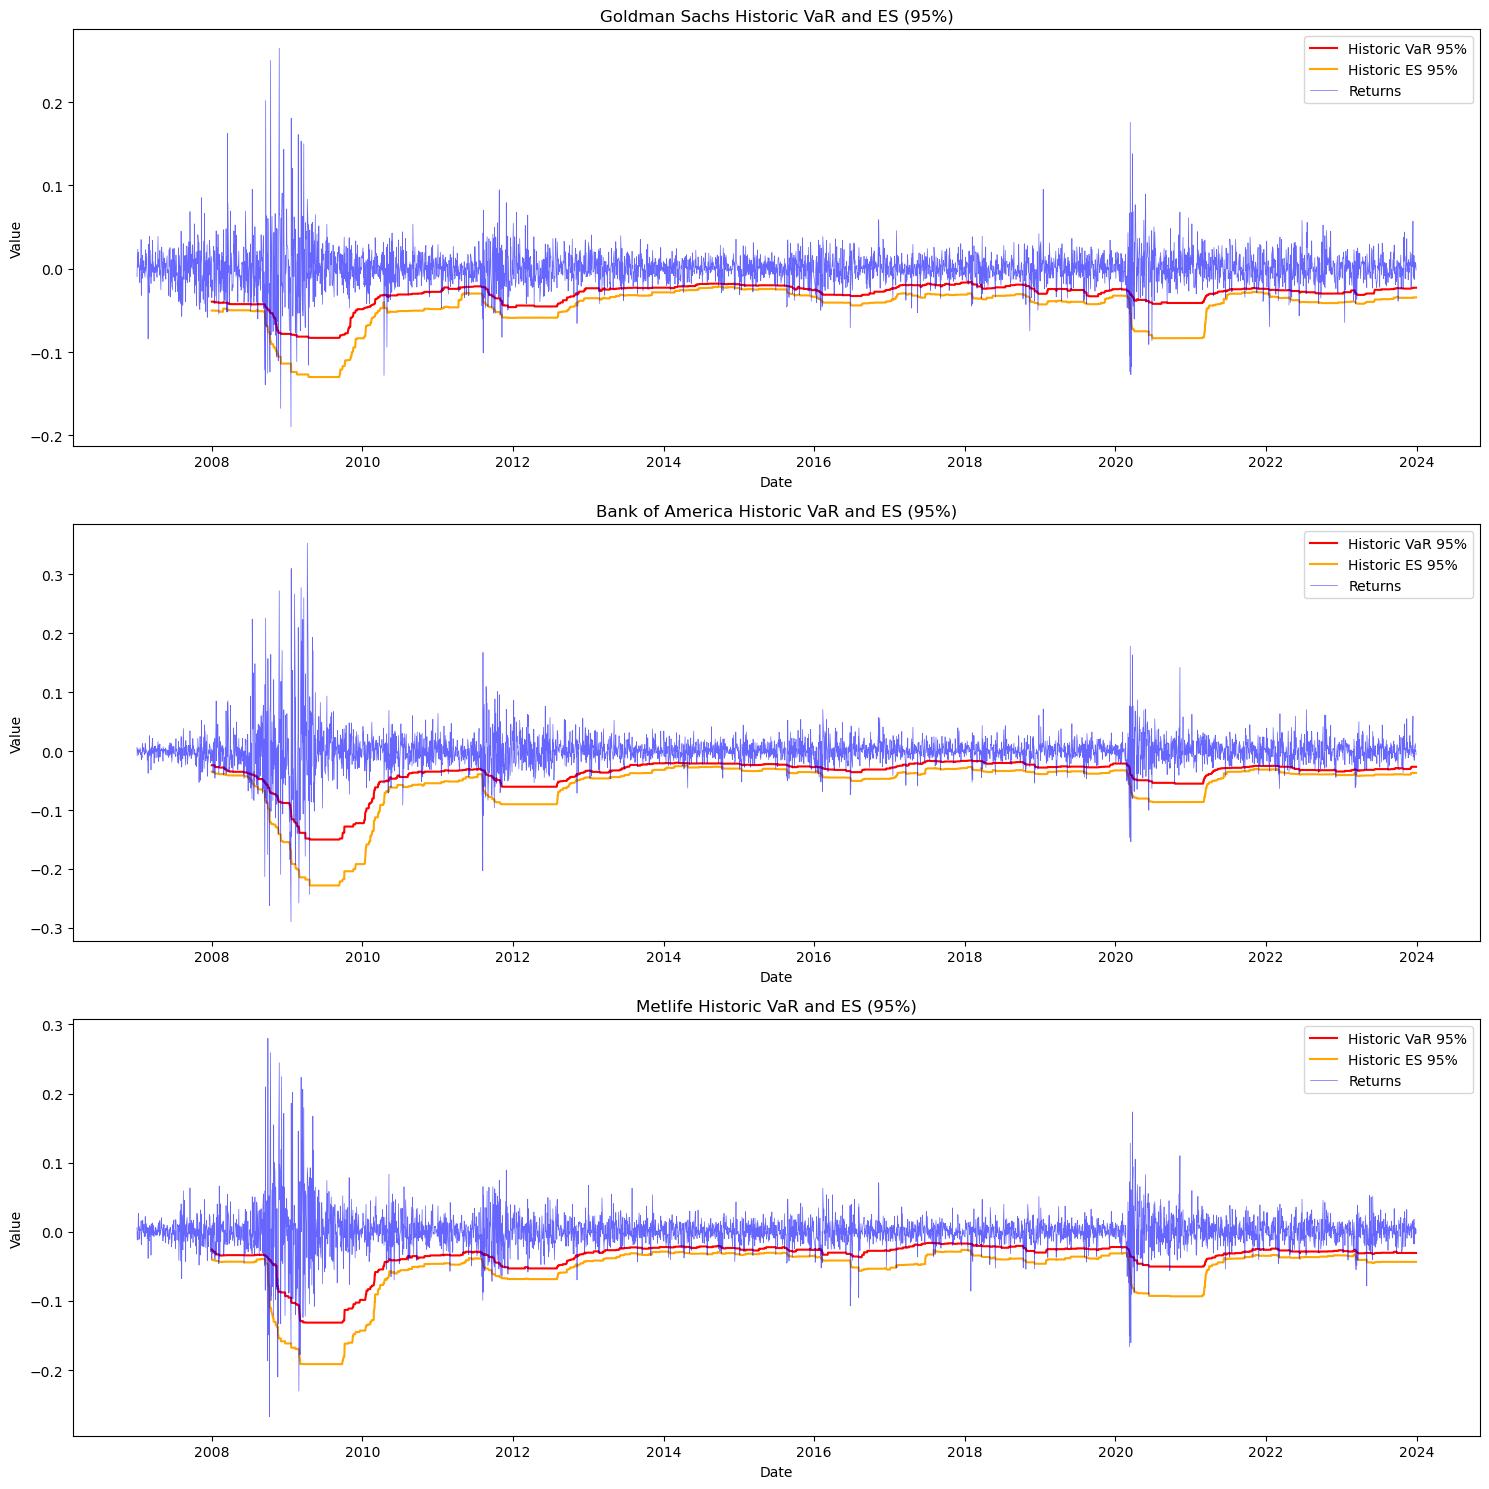

In [36]:
# plot historic var and es for all three institutions
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(GS['date'], GS['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(GS['date'], GS['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(GS['date'], GS['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Goldman Sachs Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(BAC['date'], BAC['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(BAC['date'], BAC['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(BAC['date'], BAC['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Bank of America Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(MET['date'], MET['var_95_HS'], label='Historic VaR 95%', color='red')
plt.plot(MET['date'], MET['es_95_HS'], label='Historic ES 95%', color='orange')
plt.plot(MET['date'], MET['return'], label='Returns', color='blue', alpha=0.6, linewidth=0.5)
plt.title('Metlife Historic VaR and ES (95%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

## GARCH Model

In [ ]:
# Garch Model
from arch import arch_model
def fit_garch_model(returns, vol='Garch', p=1, q=1, dist='t'):
    """
    Fit a GARCH(1,1) model to the returns.
    """
    model = arch_model(returns * 100, vol=vol, p=p, q=q, dist=dist)
    garch_fit = model.fit(disp='off')
    return garch_fit
GS_garch = fit_garch_model(GS['log_return'])
BAC_garch = fit_garch_model(BAC['log_return'])
MET_garch = fit_garch_model(MET['log_return'])


In [39]:
print("GARCH(1,1) Model Summary for Goldman Sachs:")
print(GS_garch.summary())

GARCH(1,1) Model Summary for Goldman Sachs:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8464.06
Distribution:      Standardized Student's t   AIC:                           16938.1
Method:                  Maximum Likelihood   BIC:                           16969.9
                                              No. Observations:                 4276
Date:                      Mon, Dec 15 2025   Df Residuals:                     4275
Time:                              16:11:17   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------

In [40]:
print("GARCH(1,1) Model Summary for Bank of America:")
print(BAC_garch.summary())

GARCH(1,1) Model Summary for Bank of America:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8976.54
Distribution:      Standardized Student's t   AIC:                           17963.1
Method:                  Maximum Likelihood   BIC:                           17994.9
                                              No. Observations:                 4276
Date:                      Mon, Dec 15 2025   Df Residuals:                     4275
Time:                              16:11:17   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------

In [41]:
print("GARCH(1,1) Model Summary for Metlife:")
print(MET_garch.summary())

GARCH(1,1) Model Summary for Metlife:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8656.28
Distribution:      Standardized Student's t   AIC:                           17322.6
Method:                  Maximum Likelihood   BIC:                           17354.4
                                              No. Observations:                 4276
Date:                      Mon, Dec 15 2025   Df Residuals:                     4275
Time:                              16:11:17   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------

In [ ]:
# def historic_var(returns, alpha=0.05):
#     """
#     Calculate the Value at Risk (VaR) using Historic Simulation method.
    
#     Parameters:
#     returns (pd.Series): Series of log returns.
#     alpha (float): Significance level for VaR calculation (default is 0.05 for 95% VaR).
    
#     Returns:
#     float: The VaR at the specified significance level.
#     """
#     # Sort the returns
#     sorted_returns = returns.sort_values()
#     # Calculate the index for the VaR
#     index = int(alpha * len(sorted_returns))
#     # Return the VaR
#     return -sorted_returns.iloc[index]  # set negative as in lecture, since VaR is a loss measure

# # historic ES
# def historic_es(returns, alpha=0.05):
#     """
#     Calculate the Expected Shortfall (ES) using Historic Simulation method.
    
#     Parameters:
#     returns (pd.Series): Series of log returns.
#     alpha (float): Significance level for ES calculation (default is 0.05 for 95% ES).
    
#     Returns:
#     float: The ES at the specified significance level.
#     """
#     # Sort the returns
#     sorted_returns = returns.sort_values()
#     # Calculate the index for the ES
#     index = int(alpha * len(sorted_returns))
#     # Calculate ES as the average of losses beyond VaR
#     es = -sorted_returns.iloc[:index].mean()  # set negative as in lecture, since ES is a loss measure
#     return es

# # visualize historic VaR and ES for each institution
# alpha = 0.05
# GS_var = historic_var(GS['log_return'], alpha)
# GS_es = historic_es(GS['log_return'], alpha)
# print(f"Goldman Sachs Historic VaR (95%): {GS_var}")
# print(f"Goldman Sachs Historic ES (95%): {GS_es}")
# BAC_var = historic_var(BAC['log_return'], alpha)
# BAC_es = historic_es(BAC['log_return'], alpha)
# print(f"Bank of America Historic VaR (95%): {BAC_var}")
# print(f"Bank of America Historic ES (95%): {BAC_es}")
# MET_var = historic_var(MET['log_return'], alpha)
# MET_es = historic_es(MET['log_return'], alpha)
# print(f"Metlife Historic VaR (95%): {MET_var}")
# print(f"Metlife Historic ES (95%): {MET_es}")
# # plot the historic VaR and ES on the log return plots
# plt.figure(figsize=(12, 6))
# plt.plot(GS['date'], GS['log_return'], label='Goldman Sachs', linewidth=0.4, color="C0")
# plt.axhline(-GS_var, color='red', linestyle='--', label='Historic VaR (95%)')
# plt.axhline(-GS_es, color='orange', linestyle='--', label='Historic ES (95%)')
# plt.xlabel('Date')
# plt.ylabel('Log Return')
# plt.title('Goldman Sachs Log Returns with Historic VaR and ES')
# plt.legend()
# plt.show()